## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mousestudy_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mousestudy_mousecount = len(mousestudy_df["Mouse ID"].unique())
mousestudy_mousecount


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateid = mousestudy_df[mousestudy_df.duplicated()]
duplicateid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicateid_df = mousestudy_df.loc[mousestudy_df["Mouse ID"] == "g989",:]
duplicateid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mousestudy1 = mousestudy_df.drop_duplicates()
mousestudy1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

mousestudy1_mousecount = len(mousestudy1["Mouse ID"].unique())
mousestudy1_mousecount


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
deletecolumns = ["Age_months","Weight (g)","Timepoint","Metastatic Sites"]
mousestudy1_grouped = mousestudy1.groupby("Drug Regimen")


# Create a dataframe for mean and clean up
mousestudy1_average = mousestudy1_grouped.mean()
mousestudy1_average = mousestudy1_average.drop(deletecolumns,1)
mousestudy1_average = mousestudy1_average.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})

# Create a dataframe for mean and cleanup

mousestudy1_median = mousestudy1_grouped.median()
mousestudy1_median = mousestudy1_median.drop(deletecolumns,1)
mousestudy1_median = mousestudy1_median.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})

# Create a dataframe for variance and cleanup

mousestudy1_var = mousestudy1_grouped.var()
mousestudy1_var = mousestudy1_var.drop(deletecolumns,1)
mousestudy1_var = mousestudy1_var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})

# Create a dataframe for standard deviation and cleanup

mousestudy1_std = mousestudy1_grouped.std()
mousestudy1_std = mousestudy1_std.drop(deletecolumns,1)
mousestudy1_std = mousestudy1_std.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Deviation"})

# Create a dataframe for sem and cleanup

mousestudy1_sem = mousestudy1_grouped.sem()
mousestudy1_sem = mousestudy1_sem.drop(deletecolumns,1)
mousestudy1_sem = mousestudy1_sem.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})


In [9]:
mousestudy1_sem

,Tumor Volume SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [10]:
mousestudy1_std

,Tumor Volume Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [11]:
mousestudy1_var

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.278090
Ramicane,23.486704
Stelasyn,59.450562


In [12]:
mousestudy1_median

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [13]:
mousestudy1_median

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [14]:
mousestudy1_average

,Average Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [15]:
# Merge all data to show a summary 

merged_stats = pd.merge(mousestudy1_average,mousestudy1_median,on="Drug Regimen")
merged_stats = pd.merge(merged_stats,mousestudy1_var,on="Drug Regimen")
merged_stats = pd.merge(merged_stats,mousestudy1_std,on="Drug Regimen")
merged_stats = pd.merge(merged_stats,mousestudy1_sem,on="Drug Regimen")

merged_stats

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line

mousestudy2_average = merged_stats["Average Tumor Volume"].mean()
mousestudy2_median = merged_stats["Median Tumor Volume"].median()
mousestudy2_var = merged_stats["Tumor Volume Variance"].var()
mousestudy2_std = merged_stats["Tumor Volume Standard Deviation"].std()
mousestudy2_sem = merged_stats["Tumor Volume SEM"].sem()

summary_data = pd.DataFrame({"Average Tumor Volume": [mousestudy2_average],
                             "Median Tumor Volumne": [mousestudy2_median],
                             "Tumor Volume Variance":[mousestudy2_var],
                             "Tumor Volume Standard Deviation":[mousestudy2_std],
                             "Tumor Volume SEM":[mousestudy2_sem]
                            }
                            )
summary_data


,Average Tumor Volume,Median Tumor Volumne,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,50.980721,51.819532,257.918626,1.218865,0.032433


## Bar and Pie Charts

In [17]:
mousestudy1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
deletecolumn2 = ["Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]
mousestudy_dm = mousestudy1.drop(deletecolumn2,1)
mousestudy_dm1 = mousestudy_dm.drop_duplicates()
mousestudy_dm1

,Mouse ID,Drug Regimen
0,k403,Ramicane
10,s185,Capomulin
20,x401,Capomulin
30,m601,Capomulin
40,g791,Ramicane
...,...,...
1858,z314,Stelasyn
1860,z435,Propriva
1863,z581,Infubinol
1873,z795,Naftisol


In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regimen_mouse = mousestudy_dm1.groupby('Drug Regimen')

count_mouse = regimen_mouse['Mouse ID'].count()

count_mouse_df = pd.DataFrame(count_mouse)
count_mouse_df


,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


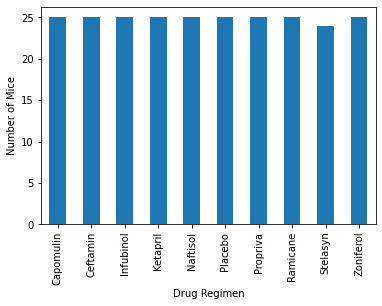

In [20]:
count_mouse_bar_panda = count_mouse.plot(kind='bar')
count_mouse_bar_panda.set_ylabel("Number of Mice")
plt.show()


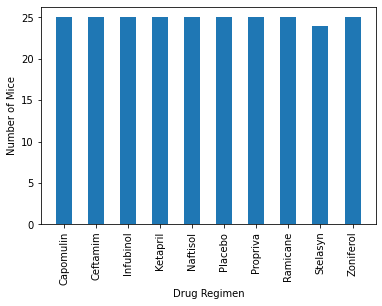

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = ["Capomulin", "Ceftamim","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mid_column = count_mouse_df['Mouse ID'].tolist()
plt.xticks(rotation='vertical')
plt.bar(x_axis,mid_column,width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

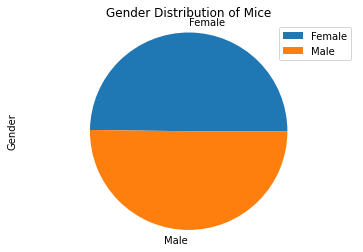

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
deletecolumn3 = ["Drug Regimen","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]
mousestudy_gender = mousestudy1.drop(deletecolumn3,1)

mousestudy_gender1 = mousestudy_gender.drop_duplicates()
mousestudy_gender1

mousestudy_gender_group = mousestudy_gender1.groupby("Sex")
mousestudy_gender_count = mousestudy_gender_group.count()
mousestudy_gender_count = mousestudy_gender_count.rename(columns={"Mouse ID":"Gender"})

mouse_pie1 = mousestudy_gender_count.plot(kind="pie",y='Gender',title="Gender Distribution of Mice")
plt.axis("equal")
plt.show()



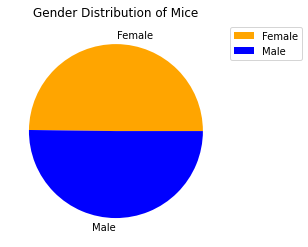

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

counts = mousestudy_gender_count['Gender'].tolist()

colors = ["orange","blue"]

plt.pie(counts,labels=labels,colors=colors)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("Gender Distribution of Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mousestudy1_grouped2 = mousestudy1.groupby("Mouse ID")
mousestudy1_grouped2 = mousestudy1_grouped2.max()

deletecolumns2 = ["Sex","Age_months","Weight (g)","Metastatic Sites","Tumor Volume (mm3)","Drug Regimen"]

mousestudy1_grouped2_cleaned = mousestudy1_grouped2.drop(deletecolumns2,1)

merge_list = ["Mouse ID","Timepoint"]
mouse_merged_v = pd.merge(mousestudy1_grouped2_cleaned,mousestudy1,on=(merge_list))

mousestudy1_filt1 = mouse_merged_v.loc[mouse_merged_v["Drug Regimen"]=="Capomulin"]
mousestudy1_filt2 = mouse_merged_v.loc[mouse_merged_v["Drug Regimen"]=="Ramicane"]
mousestudy1_filt3 = mouse_merged_v.loc[mouse_merged_v["Drug Regimen"]=="Infubinol"]
mousestudy1_filt4 = mouse_merged_v.loc[mouse_merged_v["Drug Regimen"]=="Ceftamin"]
deletecolumns6 = ["Sex","Age_months","Weight (g)","Metastatic Sites"]

mousestudy1_merge1 = pd.merge(mousestudy1_filt1,mousestudy1_filt2,how="outer")
mousestudy1_merge2 = pd.merge(mousestudy1_filt3,mousestudy1_merge1,how="outer")
mousestudy1_merge3 = pd.merge(mousestudy1_filt4,mousestudy1_merge2,how="outer")

mousestudy1_merge3


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = mousestudy1_merge3["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


outlier_mouse = mousestudy1_merge3.loc[(mousestudy1_merge3["Tumor Volume (mm3)"] < lower_bound)
                                            | (mousestudy1_merge3["Tumor Volume (mm3)"] > upper_bound)]
outlier_mouse

The lower quartile of Tumor Volume is: 37.1877438025
The upper quartile of Tumor Volume is: 59.930261755
The interquartile range of Tumor Volume is: 22.742517952499995
The median of Tumor Volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


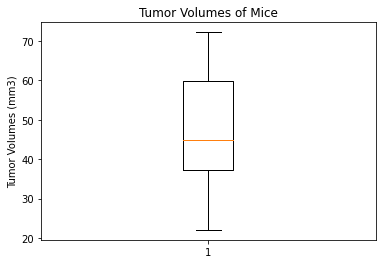

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mousestudy1_grouped2_max_plot = mousestudy1_merge3["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes of Mice')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(mousestudy1_grouped2_max_plot)
plt.show()

## Line and Scatter Plots

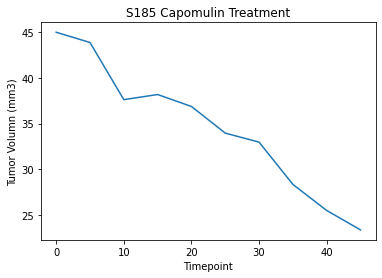

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousestudy1_filtline = mousestudy1.loc[mousestudy1["Drug Regimen"]=="Capomulin"]
mousestudy1_filtline185 = mousestudy1_filtline.loc[mousestudy1_filtline["Mouse ID"]=="s185"]
mousestudy1_filtline185
deletecolumn15 = ["Sex","Age_months","Weight (g)","Metastatic Sites","Drug Regimen","Mouse ID"]
mousestudy1_filtline185_ = mousestudy1_filtline185.drop(deletecolumn15,1)

x_axis1 = mousestudy1_filtline185["Timepoint"]
y_axis1 = mousestudy1_filtline185["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volumn (mm3)")
plt.title("S185 Capomulin Treatment")
plt.show()


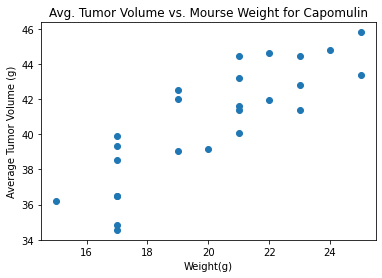

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mousestudy1_filtline
deletecolumn16 = ["Sex","Age_months","Metastatic Sites","Drug Regimen","Timepoint"]
mousestudy1_cam = mousestudy1_filtline.drop(deletecolumn16,1)
mousestudy1_cam_gr = mousestudy1_cam.groupby("Mouse ID")
mousestudy1_cam_gr_av = mousestudy1_cam_gr.mean()
mousestudy1_cam_gr_av

x_axis2 = mousestudy1_cam_gr_av["Weight (g)"]
y_axis2 = mousestudy1_cam_gr_av["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o")
plt.title("Avg. Tumor Volume vs. Mourse Weight for Capomulin")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (g)")

plt.show()


## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis2,y_axis2)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


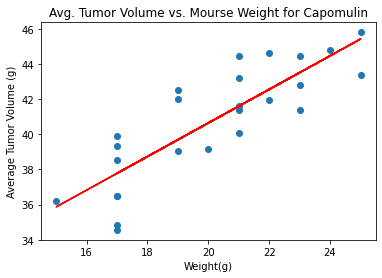

In [65]:
mousestudy1_filtline
deletecolumn16 = ["Sex","Age_months","Metastatic Sites","Drug Regimen","Timepoint"]
mousestudy1_cam = mousestudy1_filtline.drop(deletecolumn16,1)
mousestudy1_cam_gr = mousestudy1_cam.groupby("Mouse ID")
mousestudy1_cam_gr_av = mousestudy1_cam_gr.mean()
mousestudy1_cam_gr_av

x_axis2 = mousestudy1_cam_gr_av["Weight (g)"]
y_axis2 = mousestudy1_cam_gr_av["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")
plt.title("Avg. Tumor Volume vs. Mourse Weight for Capomulin")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (g)")

plt.show()